In [2]:
file_path = "/content/cleaned_data (1).csv"  # Update path if needed
df = pd.read_csv(file_path)

# Print column names
print(df.columns)

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


<ipython-input-3-b7e10d347715>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="Production", data=df, estimator='sum', ci=None, marker="o", color="b")


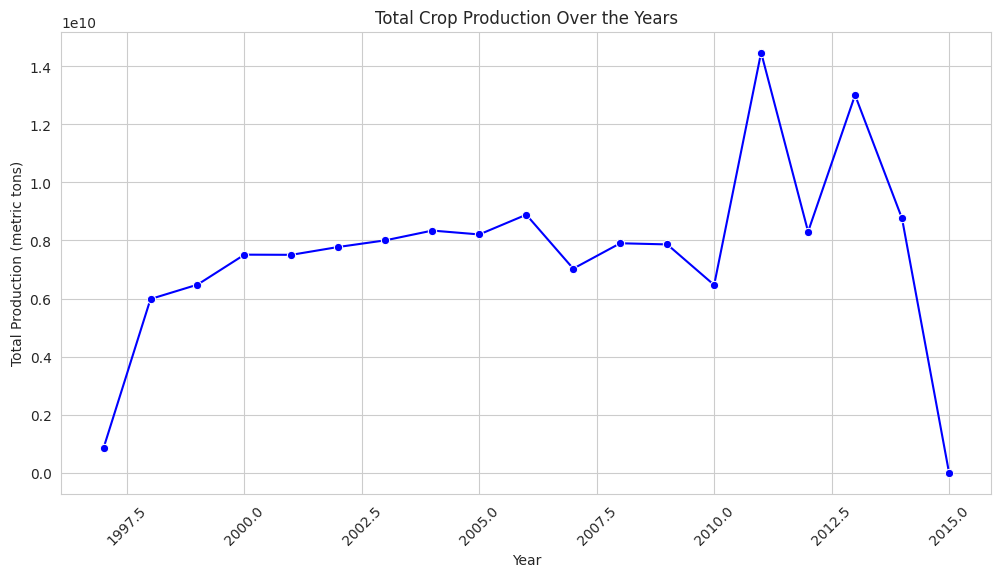

<ipython-input-3-b7e10d347715>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")


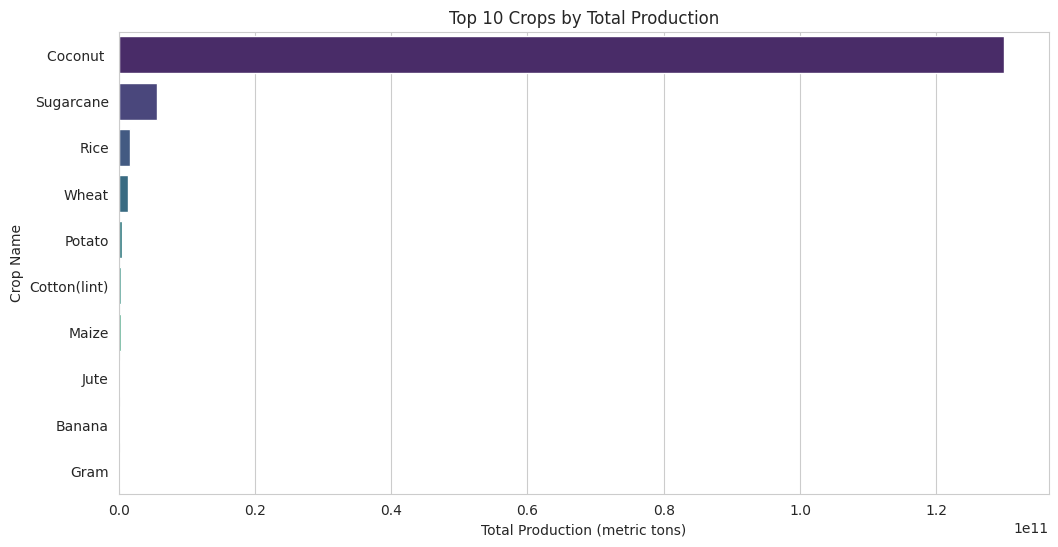

<ipython-input-3-b7e10d347715>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y="Production", data=df, palette="coolwarm")


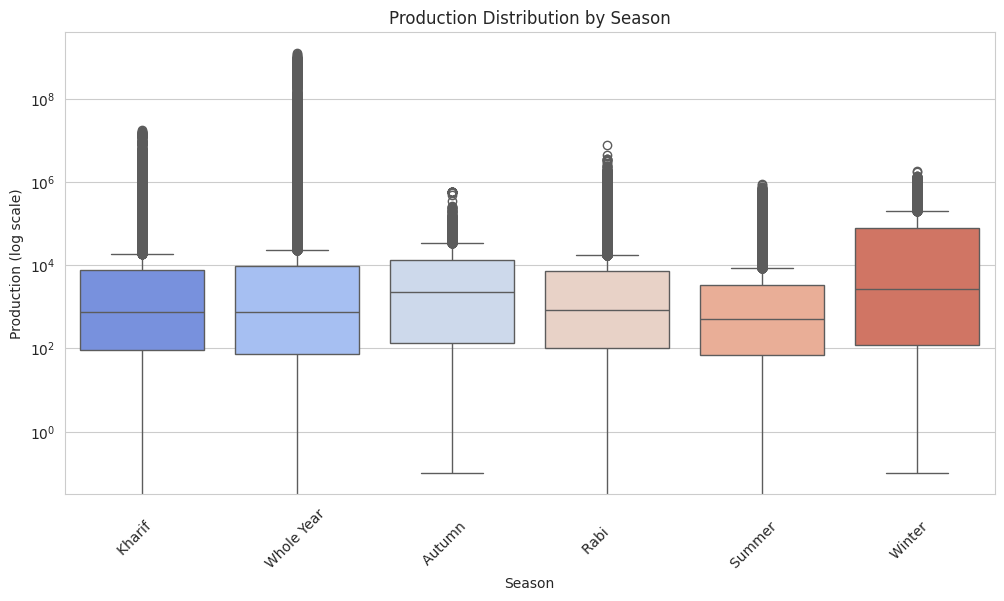

<ipython-input-3-b7e10d347715>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="magma")


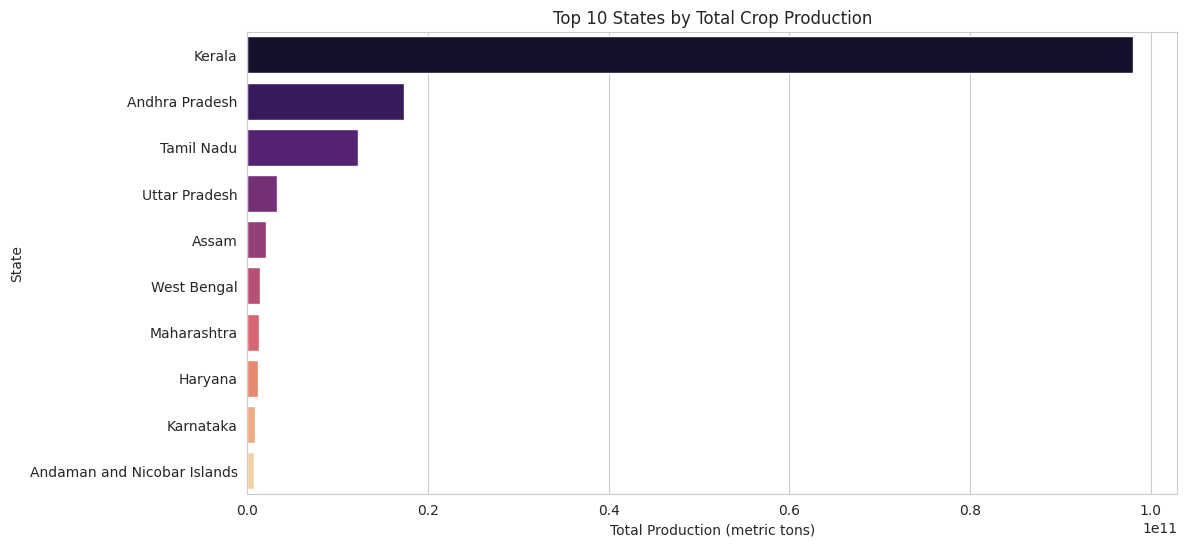

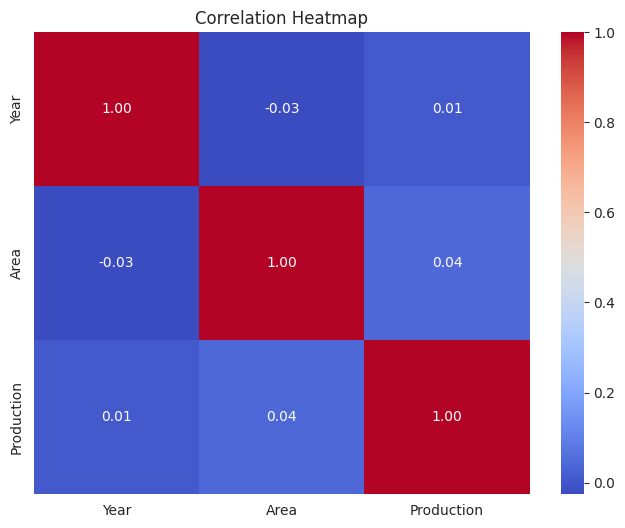

<ipython-input-3-b7e10d347715>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y="Production", data=df, showfliers=False, palette="Set2")


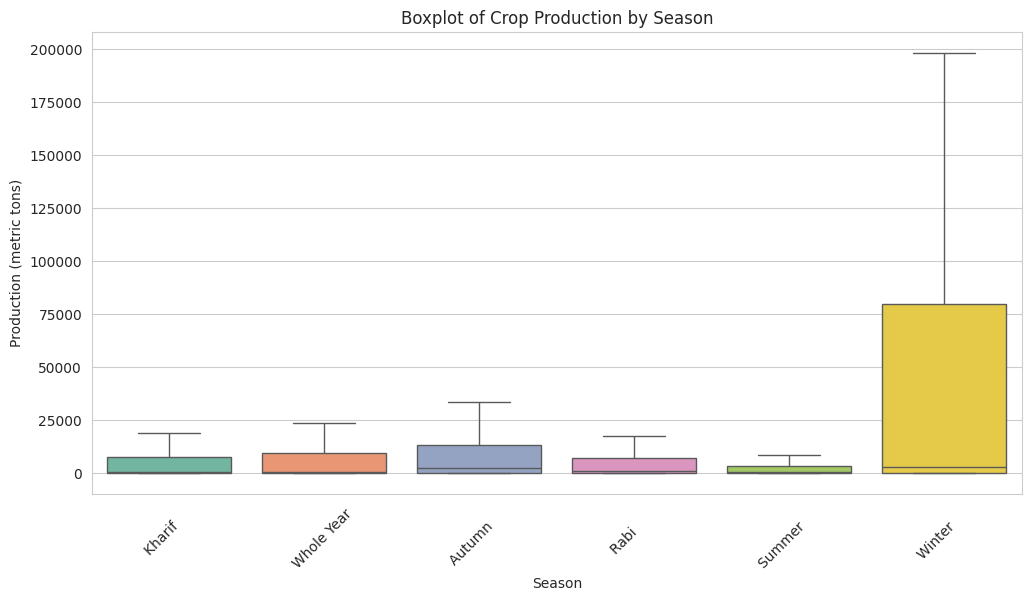

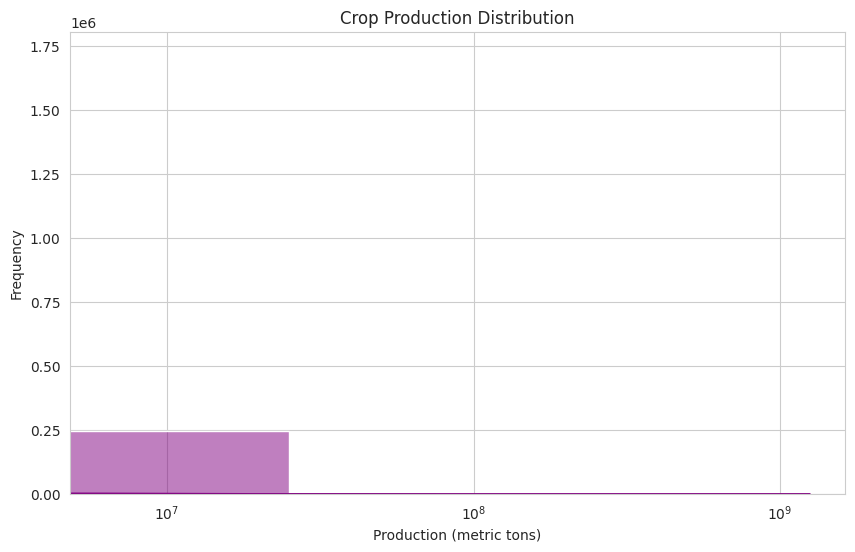

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/cleaned_data (1).csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Rename columns for consistency
df.rename(columns={'State_Name': 'State', 'District_Name': 'District',
                   'Crop_Year': 'Year', 'Crop': 'Crop_Name'}, inplace=True)

# Convert Year to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Set plot style
sns.set_style("whitegrid")

# 1. Crop Production Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Production", data=df, estimator='sum', ci=None, marker="o", color="b")
plt.title("Total Crop Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Production (metric tons)")
plt.xticks(rotation=45)
plt.show()

# 2. Top 10 Crops by Total Production
top_crops = df.groupby("Crop_Name")["Production"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")
plt.title("Top 10 Crops by Total Production")
plt.xlabel("Total Production (metric tons)")
plt.ylabel("Crop Name")
plt.show()

# 3. Production by Season
plt.figure(figsize=(12, 6))
sns.boxplot(x="Season", y="Production", data=df, palette="coolwarm")
plt.yscale("log")  # Log scale to handle outliers
plt.title("Production Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Production (log scale)")
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 States by Total Production
top_states = df.groupby("State")["Production"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="magma")
plt.title("Top 10 States by Total Crop Production")
plt.xlabel("Total Production (metric tons)")
plt.ylabel("State")
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Year', 'Area', 'Production']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 6. Boxplot of Production by Season
plt.figure(figsize=(12, 6))
sns.boxplot(x="Season", y="Production", data=df, showfliers=False, palette="Set2")
plt.title("Boxplot of Crop Production by Season")
plt.xlabel("Season")
plt.ylabel("Production (metric tons)")
plt.xticks(rotation=45)
plt.show()

# 7. Crop Production Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Production"], bins=50, kde=True, color="purple")
plt.title("Crop Production Distribution")
plt.xlabel("Production (metric tons)")
plt.ylabel("Frequency")
plt.xscale("log")  # Log scale to handle large differences in production
plt.show()
